# Customer demographics

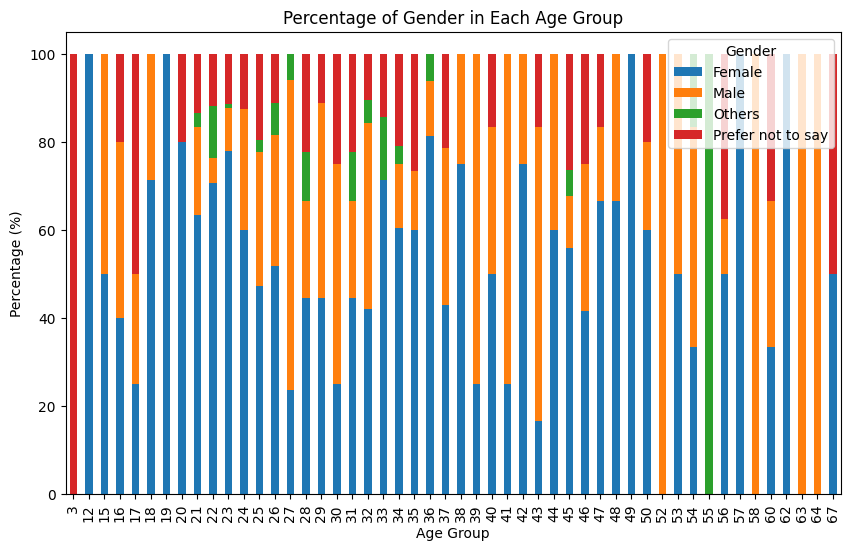

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from the CSV file
data = pd.read_csv('chaya.csv')

# Group the data by 'Age' and 'Gender' and count the occurrences
grouped_data = data.groupby(['age', 'Gender']).size().unstack(fill_value=0)

# Calculate the total count of customers in each age group
total_customers_in_age_group = grouped_data.sum(axis=1)

# Calculate the percentage of each gender in each age group
percentage_data = grouped_data.div(total_customers_in_age_group, axis=0) * 100

# Create a bar plot for each age group
percentage_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Percentage of Gender in Each Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage (%)')
plt.legend(title='Gender', loc='upper right')
plt.show()


# Purchase Behaviour

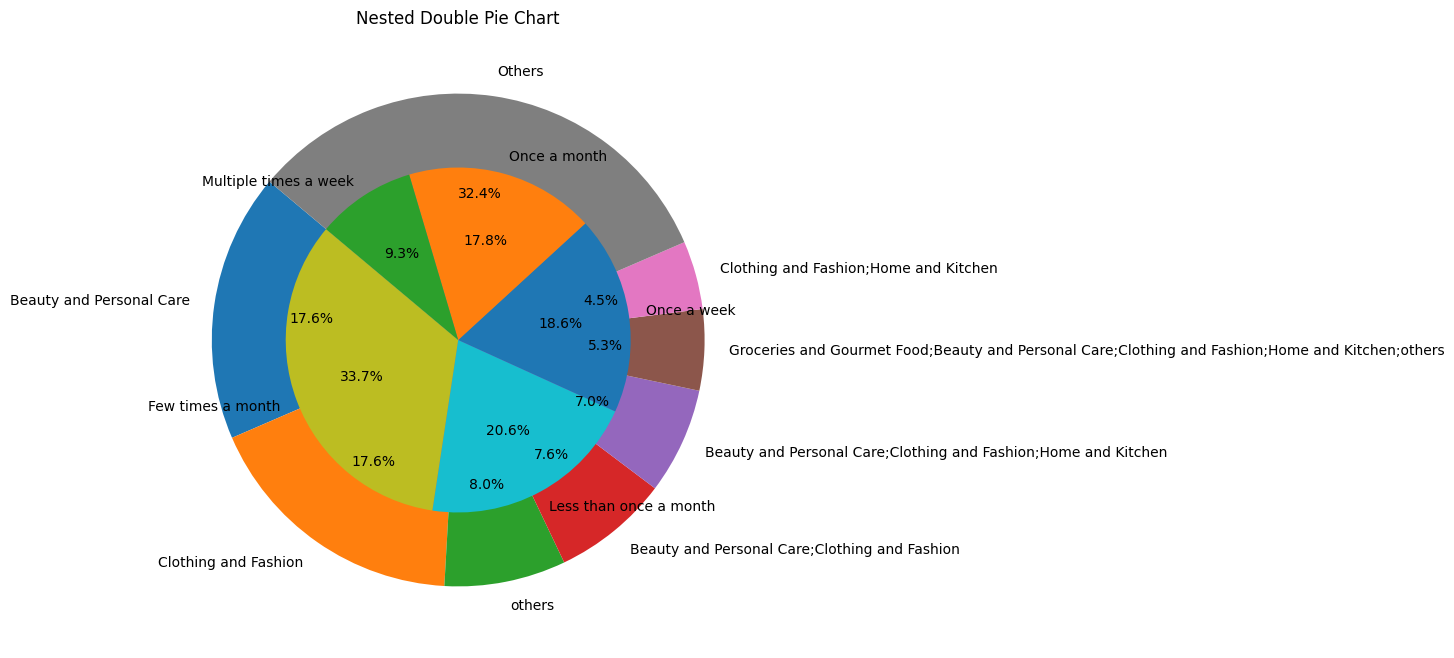

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from the CSV file
data = pd.read_csv('chaya.csv')

# Count the occurrences of each unique value in "Purchase_Categories" and "Purchase_Frequency"
category_counts = data['Purchase_Categories'].value_counts()
frequency_counts = data['Purchase_Frequency'].value_counts()

# Replace categories with counts less than 10% in both layers with "Others"
threshold = 0.04 * len(data)  # 10% threshold

# Replace in "Purchase_Categories"
category_counts['Others'] = category_counts[category_counts < threshold].sum()
category_counts = category_counts[category_counts >= threshold]

# Replace in "Purchase_Frequency"
frequency_counts['Others'] = frequency_counts[frequency_counts < threshold].sum()
frequency_counts = frequency_counts[frequency_counts >= threshold]

# Create the outer pie chart based on the "Purchase_Categories" counts
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)

# Create the inner pie chart based on the "Purchase_Frequency" counts
plt.gca().set_aspect('equal')  # Equal aspect ratio ensures a circular pie chart
plt.pie(frequency_counts, labels=frequency_counts.index, autopct='%1.1f%%', radius=0.7, startangle=140)

# Add a title
plt.title('Nested Double Pie Chart')

# Display the chart
plt.show()


# Browsing behaviour

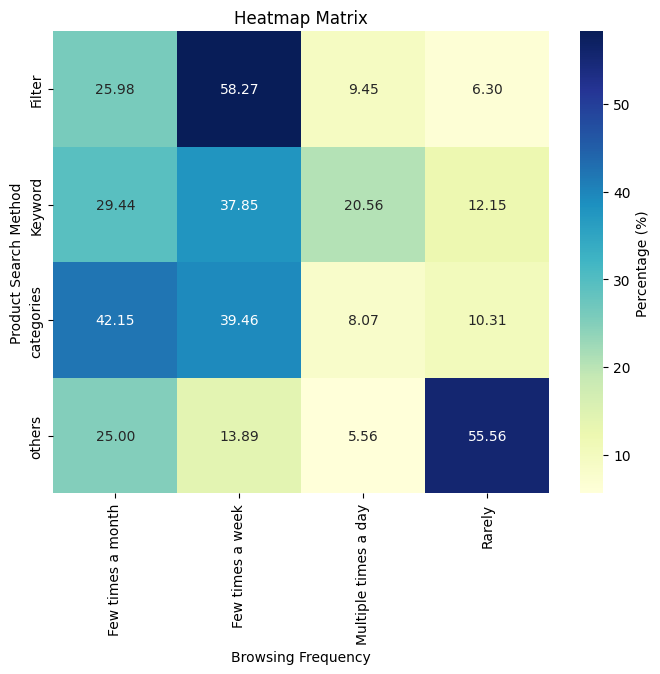

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data from the CSV file
data = pd.read_csv('chaya.csv')

# Calculate the percentage occurrence for each combination of values
heatmap_data = data.groupby(['Product_Search_Method', 'Browsing_Frequency']).size().unstack()
heatmap_data = heatmap_data.div(heatmap_data.sum(axis=1), axis=0) * 100

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='YlGnBu', cbar_kws={'label': 'Percentage (%)'})

# Customize labels and title
plt.xlabel('Browsing Frequency')
plt.ylabel('Product Search Method')
plt.title('Heatmap Matrix')

# Show the heatmap
plt.show()
